In [2]:
def cosamp(phi, u, s, epsilon=1e-10, max_iter=1000):
    """
    Return an `s`-sparse approximation of the target signal
    Input:
        - phi, sampling matrix
        - u, noisy sample vector
        - s, sparsity
    """
    a = np.zeros(phi.shape[1])
    v = u
    it = 0 # count
    halt = False
    while not halt:
        it += 1
        print("Iteration {}\r".format(it), end="")
        
        y = np.dot(np.transpose(phi), v)
        omega = np.argsort(y)[-(2*s):] # large components
        omega = np.union1d(omega, a.nonzero()[0]) # use set instead?
        phiT = phi[:, omega]
        b = np.zeros(phi.shape[1])
        # Solve Least Square
        b[omega], _, _, _ = np.linalg.lstsq(phiT, u)
        
        # Get new estimate
        b[np.argsort(b)[:-s]] = 0
        a = b
        
        # Halt criterion
        v_old = v
        v = u - np.dot(phi, a)

        halt = (np.linalg.norm(v - v_old) < epsilon) or \
            np.linalg.norm(v) < epsilon or \
            it > max_iter
        
    return a
# cosamp function is available at https://github.com/avirmaux/CoSaMP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
sys.path.append(os.path.join('..','addDependencies','UTILS'))

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

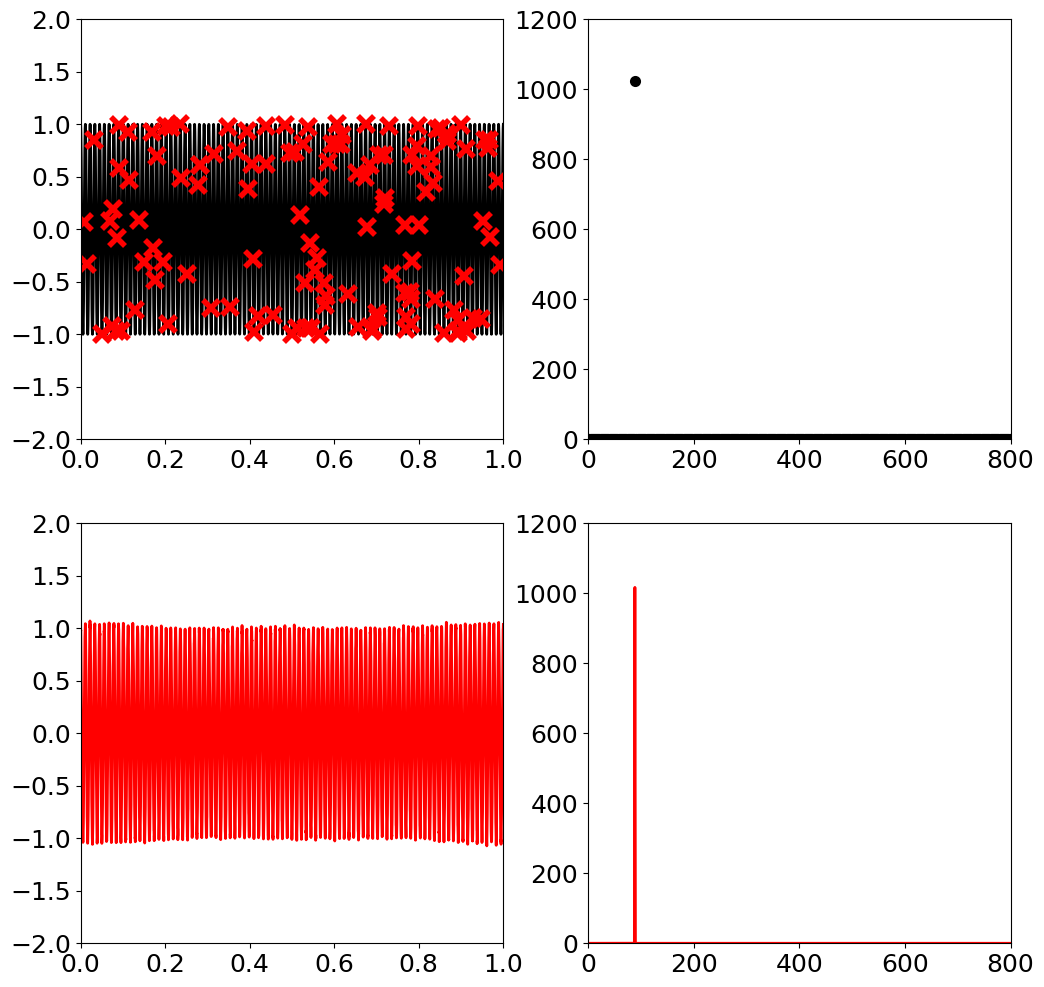

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

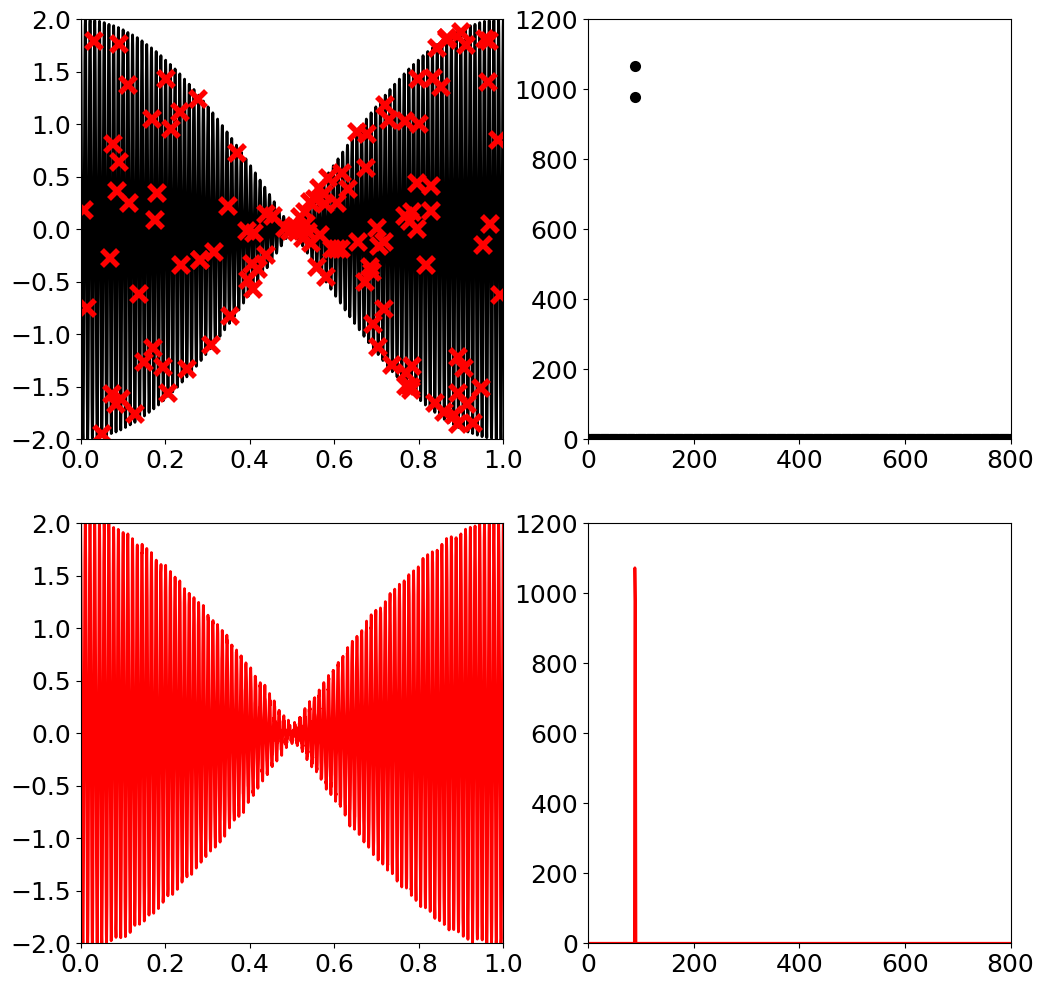

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

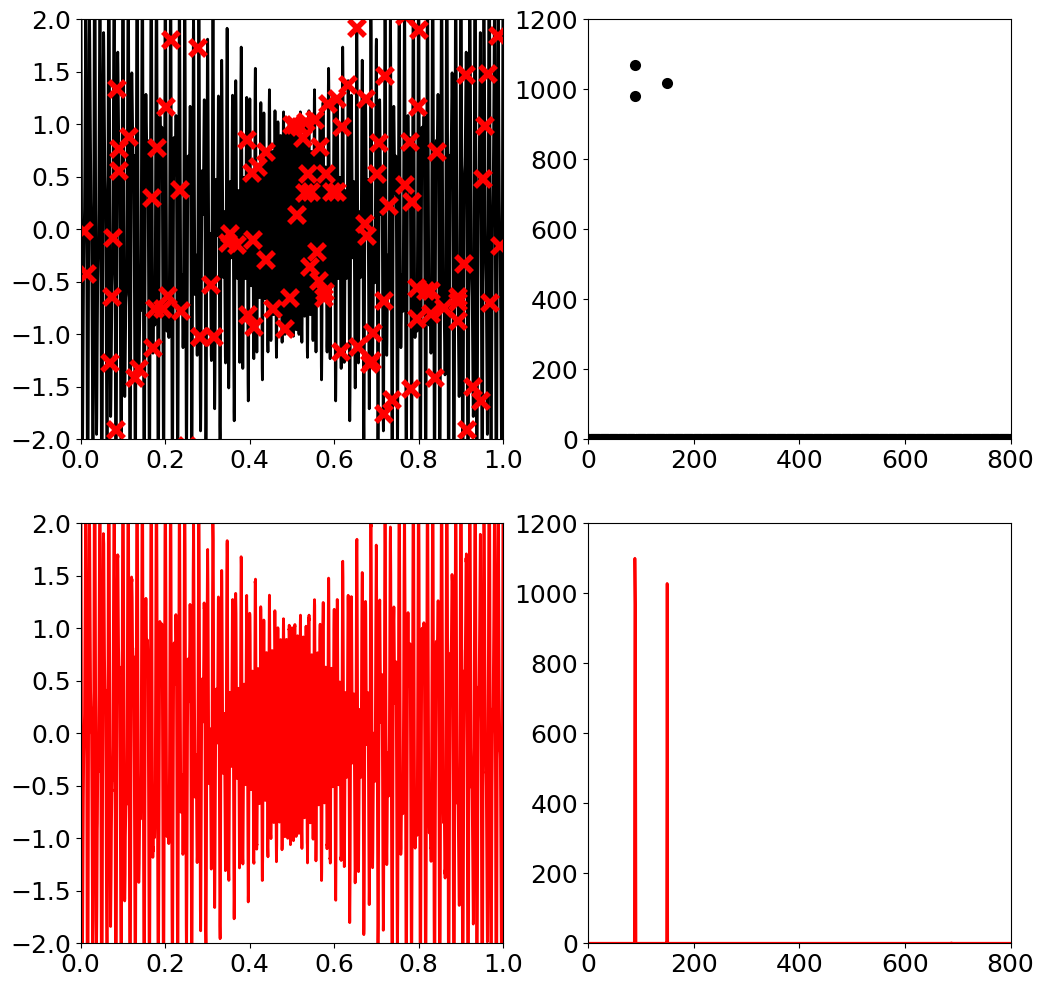

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

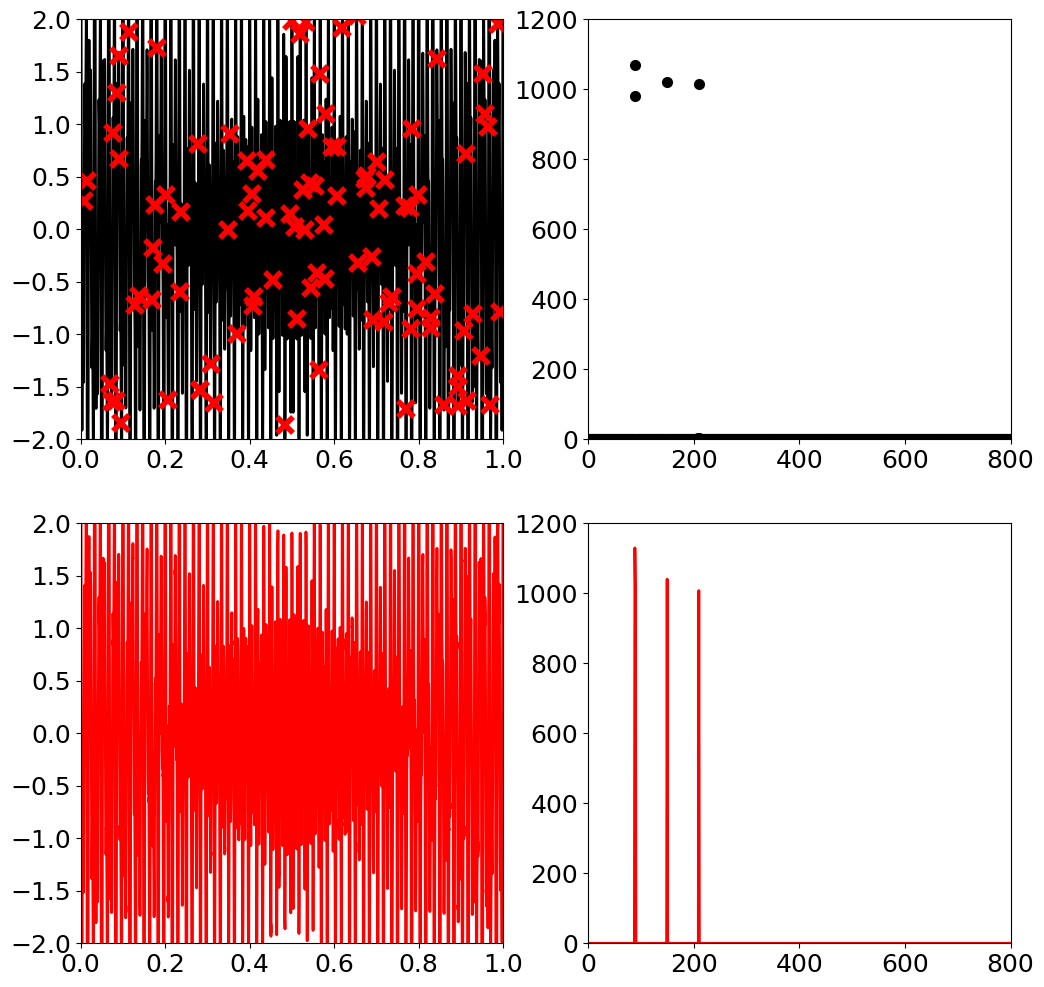

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

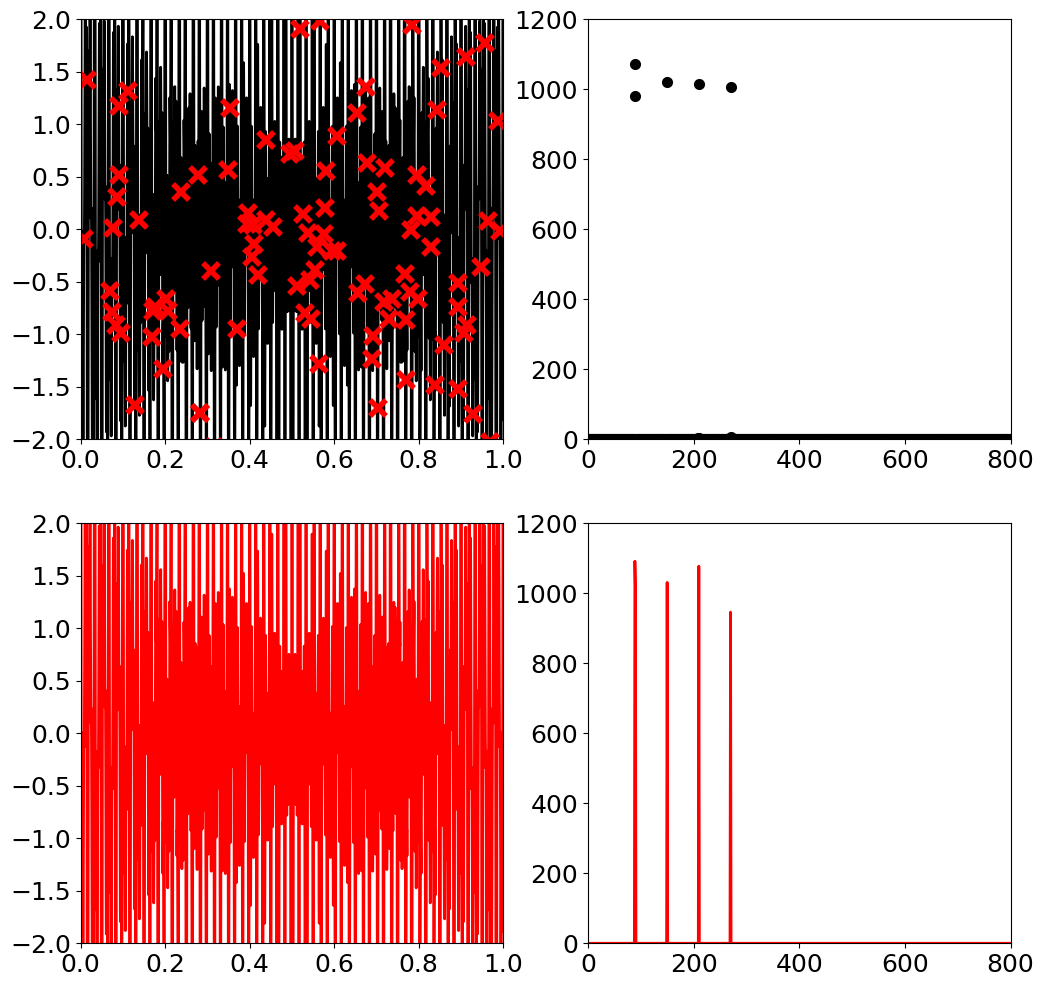

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

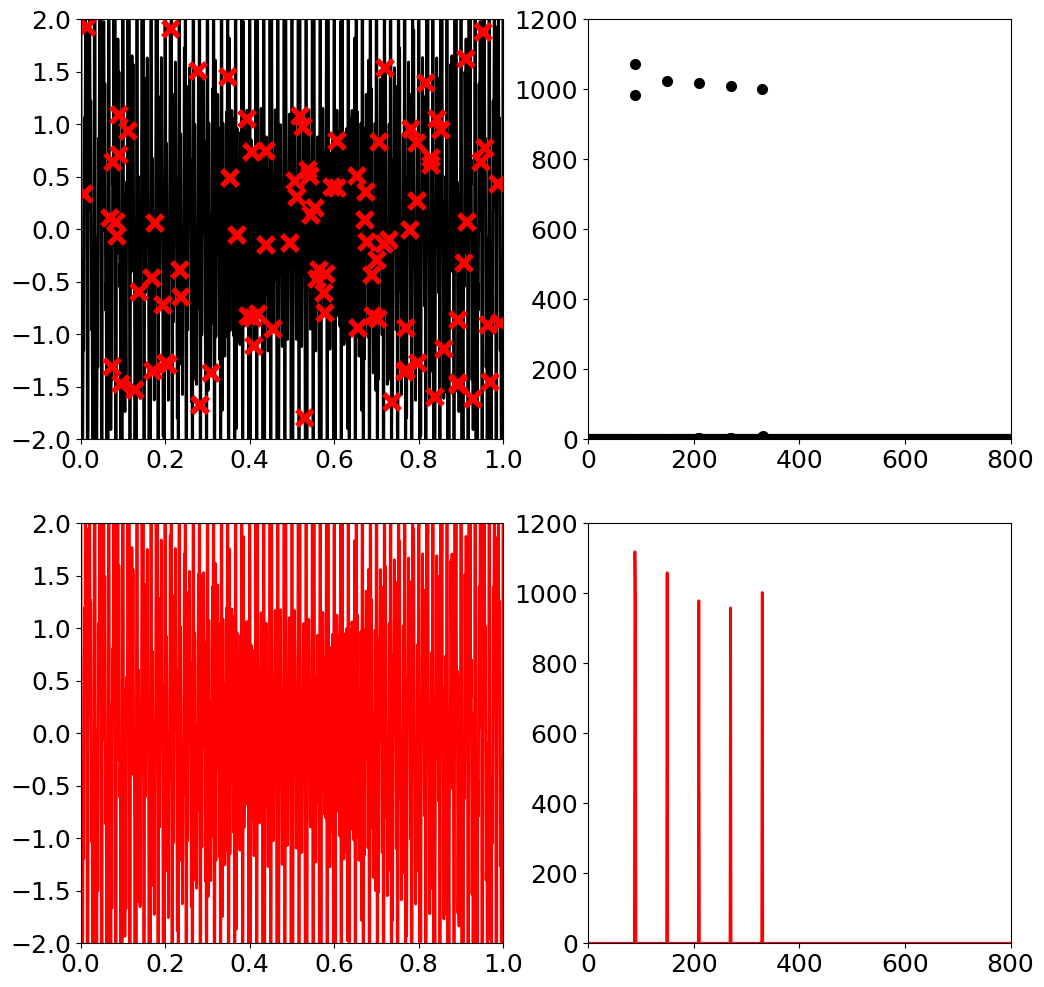

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

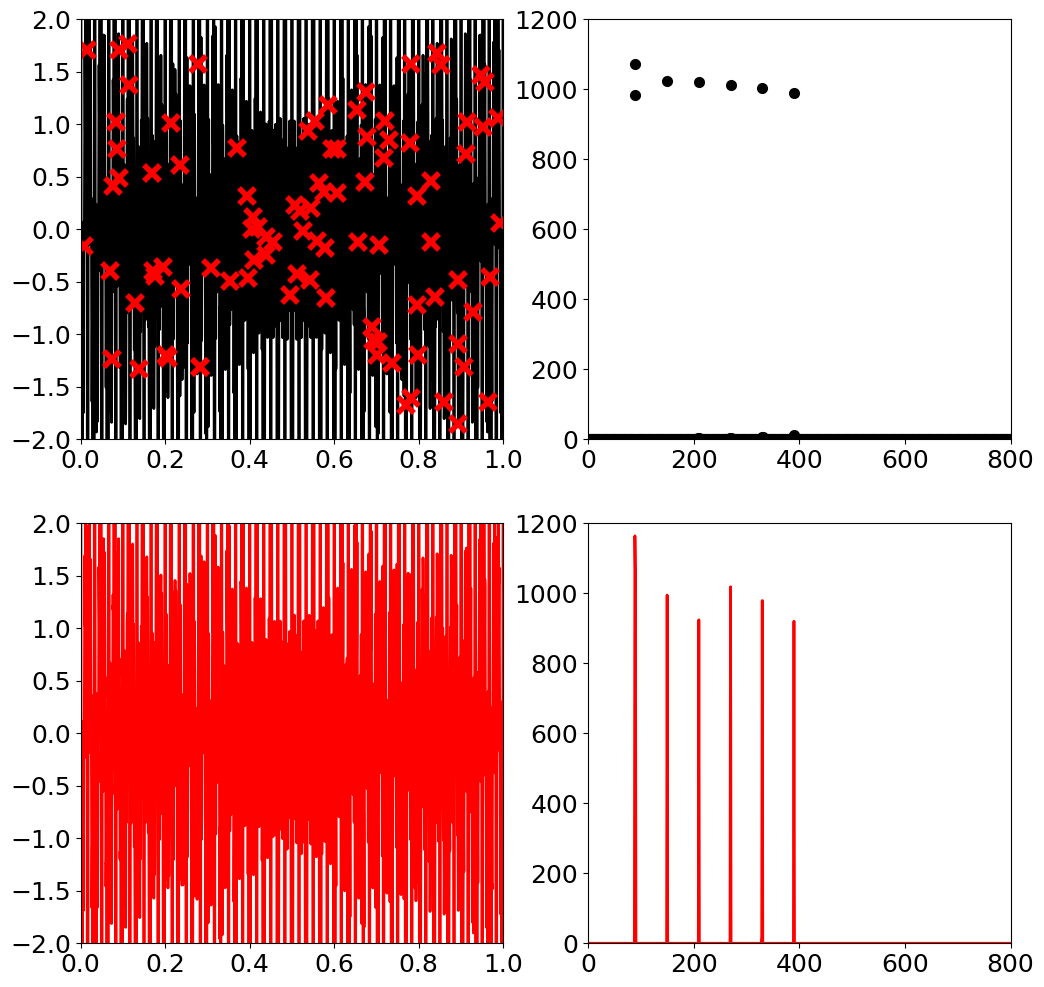

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

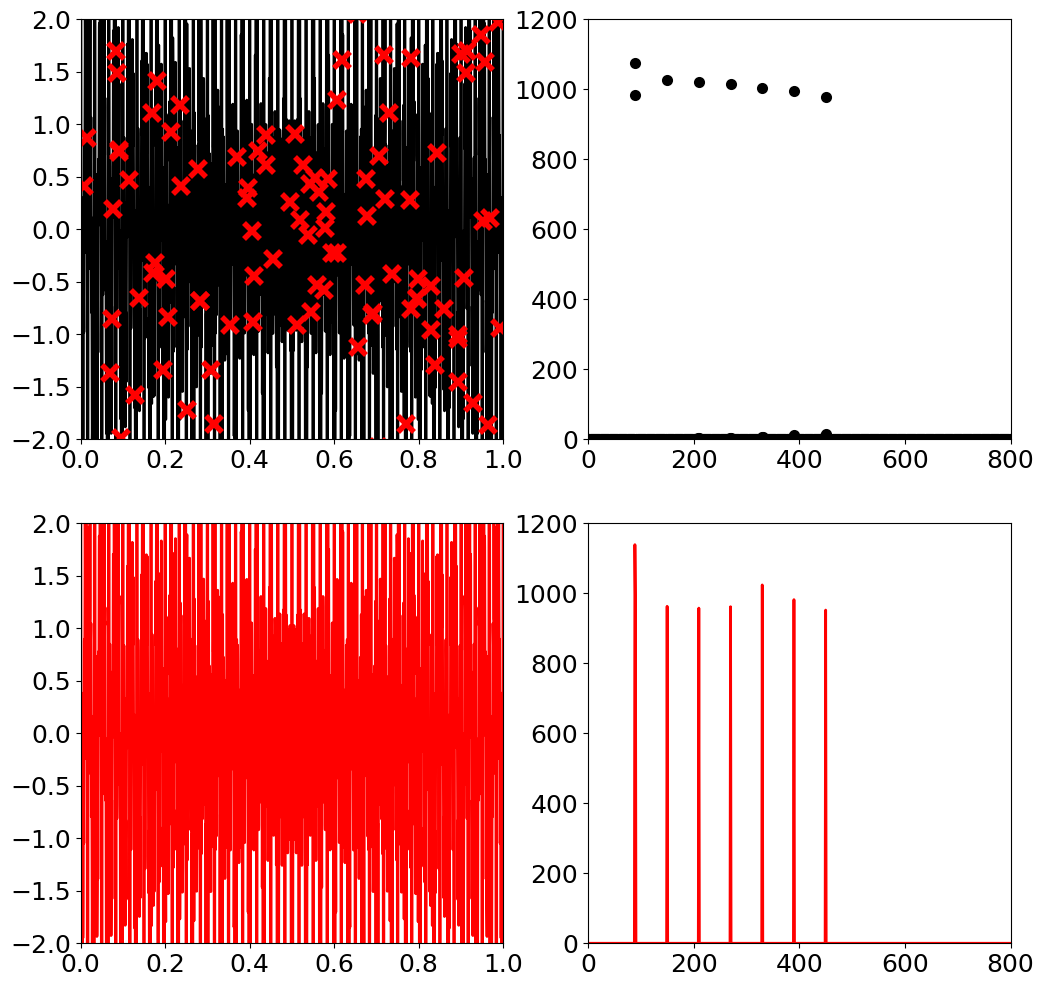

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

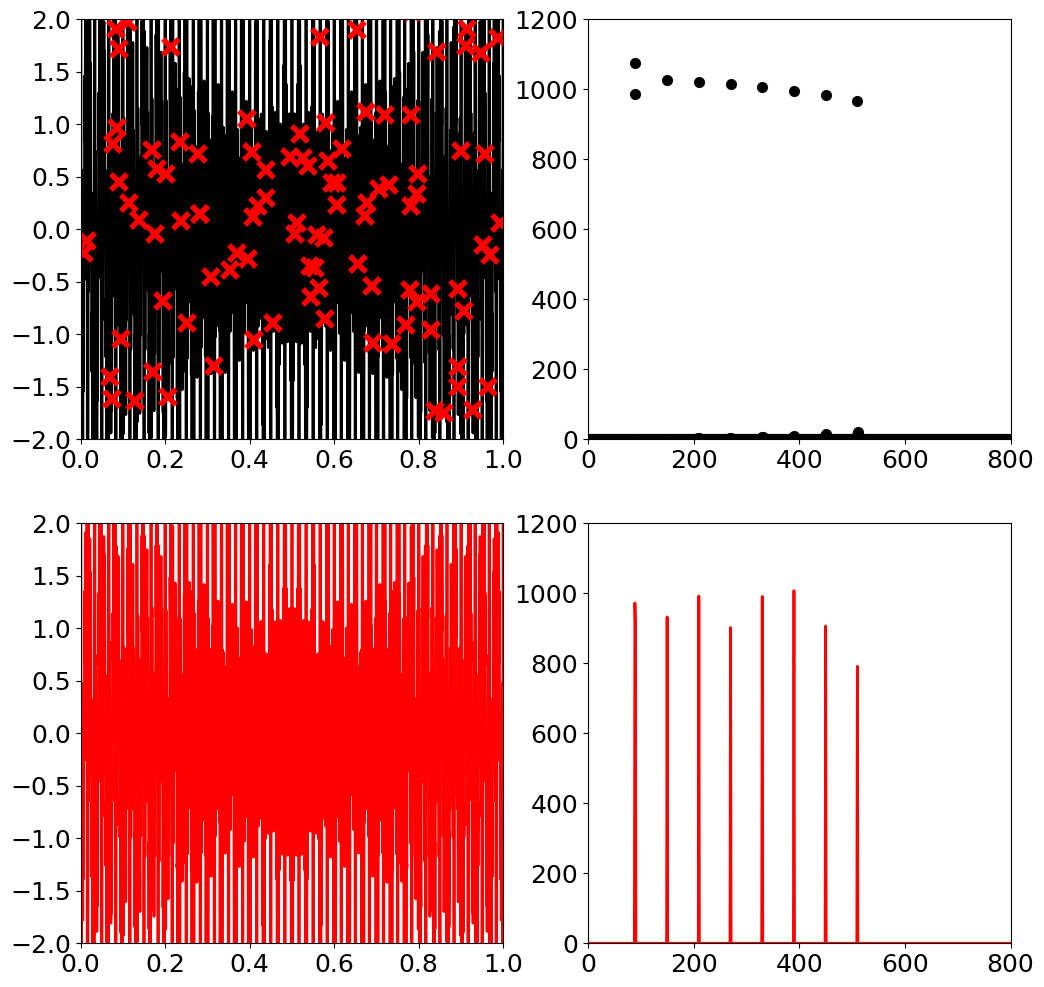

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

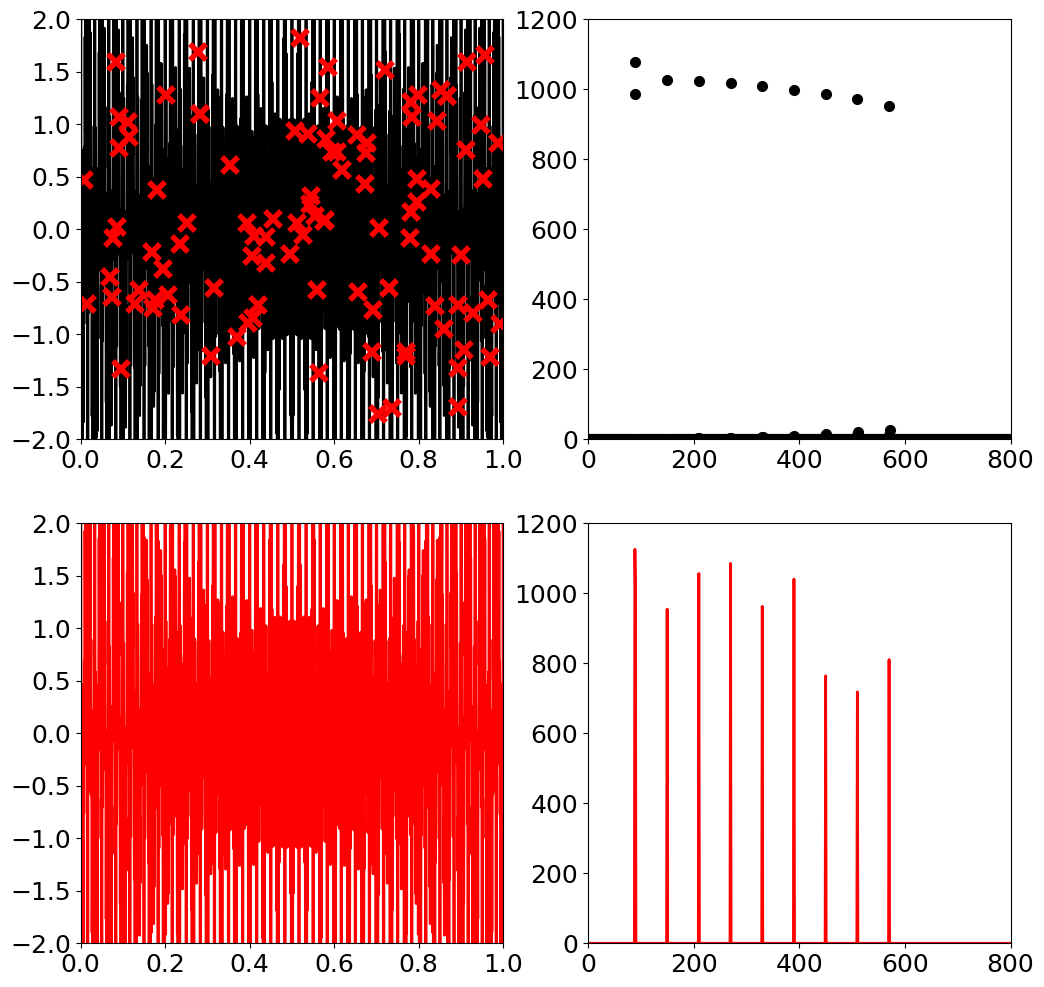

array([[ 2.00000000e+00,  1.99999985e+00,  1.99999941e+00, ...,
         2.30097067e-03,  1.53398064e-03,  7.66990375e-04],
       [ 2.00000000e+00,  1.99999868e+00,  1.99999471e+00, ...,
        -6.90289984e-03, -4.60193830e-03, -2.30097067e-03],
       [ 2.00000000e+00,  1.99999632e+00,  1.99998529e+00, ...,
         1.15047925e-02,  7.66988514e-03,  3.83494962e-03],
       ...,
       [ 2.00000000e+00, -1.99999632e+00,  1.99998529e+00, ...,
        -1.15047925e-02,  7.66988514e-03, -3.83494962e-03],
       [ 2.00000000e+00, -1.99999868e+00,  1.99999471e+00, ...,
         6.90289984e-03, -4.60193830e-03,  2.30097067e-03],
       [ 2.00000000e+00, -1.99999985e+00,  1.99999941e+00, ...,
        -2.30097067e-03,  1.53398064e-03, -7.66990375e-04]],
      shape=(4096, 4096))

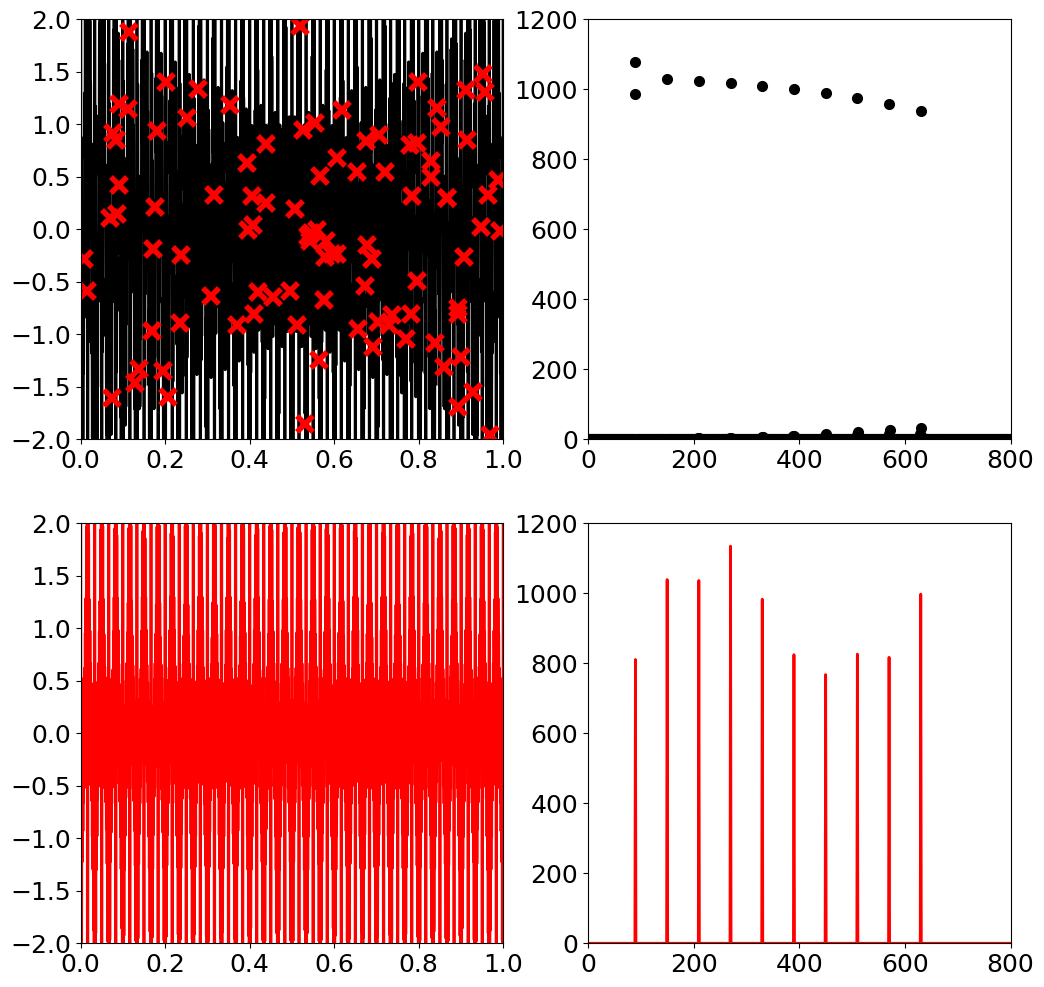

In [10]:
## Generate signal, DCT of signal

n = 4096 # points in high resolution signal
t = np.linspace(0,1,n)
p = 128 # num. random samples, p = n/32
perm = np.floor(np.random.rand(p) * n).astype(int)


x = np.cos(2 * 89 * np.pi * t) 
for addfreq in range(90, 700, 60):
    
    
    xt = np.fft.fft(x) # Fourier transformed signal
    PSD = xt * np.conj(xt) / n # Power spectral density
    y = x[perm]


    
    Psi = dct(np.identity(n)) 
    display(Psi)
    Theta = Psi[perm,:]       
    
    s = cosamp(Theta,y,10,epsilon=1.e-10,max_iter=10) 
    xrecon = idct(s) 
    
    
    ## Plot
    time_window = np.array([0,4096])/n
    freq = np.arange(n)
    L = int(np.floor(n/2))
    
    
    fig,axs = plt.subplots(2,2)
    axs = axs.reshape(-1)
    
    axs[1].scatter(freq[:L],PSD[:L],color='k',linewidth=2)
    axs[1].set_xlim(0, 800)
    axs[1].set_ylim(0, 1200)
    
    axs[0].plot(t,x,color='k',linewidth=2)
    axs[0].plot(perm/n,y,color='r',marker='x',linewidth=0,ms=12,mew=4)
    axs[0].set_xlim(time_window[0],time_window[1])
    axs[0].set_ylim(-2, 2)
    
    axs[2].plot(t,xrecon,color='r',linewidth=2)
    axs[2].set_xlim(time_window[0],time_window[1])
    axs[2].set_ylim(-2, 2)
    
    xtrecon = np.fft.fft(xrecon,n) # computes the (fast) discrete fourier transform
    PSDrecon = xtrecon * np.conj(xtrecon)/n # Power spectrum (how much power in each freq)
    
    axs[3].plot(freq[:L],PSDrecon[:L],color='r',linewidth=2)
    axs[3].set_xlim(0, 800)
    axs[3].set_ylim(0, 1200)
    
    plt.show()

    x += np.cos(2 * addfreq * np.pi * t)